# **Lean Six Sigma - Logistic Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Import Data**

In [2]:
# Import Data
df_incentive = pd.read_excel('df_incentive.xlsx')

# replace column names
print("{:,} records".format(len(df_incentive)))
df_incentive.head()


336 records


,Incentive,Target
0,16,0
1,10,0
2,19,1
3,12,0
4,19,1


**Box plot of the two values distribution**


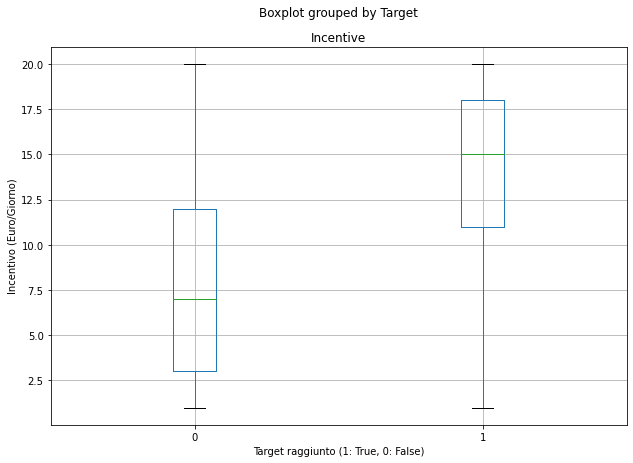

In [3]:
# Boxplot
df_incentive.boxplot(figsize=(10,7), by=['Target'], column = ['Incentive'])
plt.xlabel('Target raggiunto (1: True, 0: False)')
plt.ylabel('Incentivo (Euro/Giorno)')
plt.show()

**Format**

In [4]:
# Format 
df_calc = pd.DataFrame(df_incentive.groupby(['Incentive'])['Target'].sum())
df_calc.columns = ['Target']
# Count waves
df_calc['No Target'] = df_incentive.groupby(['Incentive'])['Target'].count() - df_calc['Target']
df_calc['Total'] = df_incentive.groupby(['Incentive'])['Target'].count()
# Reset index and sort by number of lines
df_calc.reset_index(inplace = True)
df_calc.sort_values(['Incentive'], ascending = True, inplace = True)
df_calc.head()

,Incentive,Target,No Target,Total
0,1,1,18,19
1,2,0,15,15
2,3,2,10,12
3,4,1,14,15
4,5,5,9,14


**Fit and Predict**

In [5]:
# Define X, y
X = df_incentive[['Incentive']]
y = df_incentive['Target']
# Training/Test Sets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
# Instantiate the model
log_regression = LogisticRegression()
# Fit your model
log_regression.fit(X_train,y_train)

# Calculate p-value 
denom = (2.0*(1.0+np.cosh(log_regression.decision_function(X))))
denom = np.tile(denom,(X.shape[1],1)).T
# Fisher Information Matrix
F_ij = np.dot((X/denom).T,X)
## Inverse Information Matrix
Cramer_Rao = np.linalg.inv(F_ij) 
sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
# z-score for eaach model coefficient
z_scores = log_regression.coef_[0]/sigma_estimates 
# two tailed test for p-values
p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] 

print("p-value: {}".format(p_values[0]))

p-value: 2.1327739857133364e-141


**Final Plot**

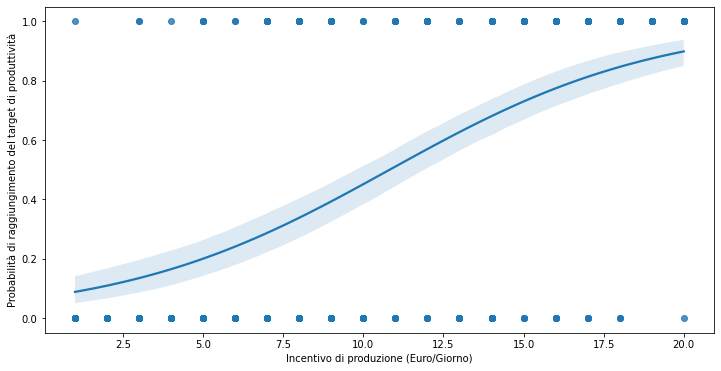

In [10]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.regplot(x='Incentive', y='Target', data=df_incentive, logistic=True, ax = ax)
plt.xlabel('Incentivo di produzione (Euro/Giorno)')
plt.ylabel('Probabilità di raggiungimento del target di produttività')
plt.show()